In [2]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import importlib

## Regularization
* penalty_values = [0, 1e-7, 1e-5, 1e-3, 0.01, 0.1, 1]
* [7, 36, 1]
* "tol" : 1e-5
* "compl_inf_tol": 1e-3, "constr_viol_tol": 1e-3

In [4]:
fn = '2024-08-15_20-39-02_reg_full.pkl'
with open(f'results/{fn}', 'rb') as file:
    results_reg_full = pickle.load(file)

In [17]:
results_reg_full[(0, '2015-01-05')]

{'result': {'solver_time': 164.43716096878052,
  'termination_condition': <TerminationCondition.maxIterations: 'maxIterations'>,
  'message': 'Ipopt 3.14.16\\x3a Maximum Number of Iterations Exceeded.'},
 'times_elapsed': 164.43716096878052,
 'mse_odeint': 1.8516538138729286,
 'mse_coll_ode': 0.13517974751774087,
 'mse_odeint_test': 6.7347220614451535,
 'mse_coll_ode_test': 0.5683386185523489}

In [61]:
def collect_data(results):
    keys = [k[0] for k in results.keys()]
    keys = list(set(keys))

    def init_di():
        return {key: [] for key in keys}

    times_elapsed = init_di()
    mse_odeint = init_di()
    mse_coll_ode = init_di()
    mse_odeint_test = init_di()
    mse_coll_ode_test = init_di()

    for key in keys:
        for k, v in results.items():
            if k[0] == key:
                times_elapsed[key].append(v['times_elapsed'])
                mse_odeint[key].append(v['mse_odeint'])
                mse_coll_ode[key].append(v['mse_coll_ode'])
                mse_odeint_test[key].append(v['mse_odeint_test'])
                mse_coll_ode_test[key].append(v['mse_coll_ode_test'])

    data = {
        'Times_Elapsed': times_elapsed,
        'MSE_ODEint': mse_odeint,
        'MSE_Coll_ODE': mse_coll_ode,
        'MSE_ODEint_Test': mse_odeint_test,
        'MSE_Coll_ODE_Test': mse_coll_ode_test
    }
    
    df = pd.DataFrame(data, index=keys)
    df.sort_index(inplace=True)
    return df

def plot_boxplots(data1, data2, labels, title, ylabel, colors=('blue', 'green'), color_labels = ['Pyomo', 'Diffrax'],
                  x_label = 'Model Size Configuration'):
    n_groups = len(data1)
    positions_1 = [2 * i + 1.1 for i in range(n_groups)]
    positions_2 = [2 * i + 1.9 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box1 = plt.boxplot(data1, positions=positions_1, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[0]))
    box2 = plt.boxplot(data2, positions=positions_2, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[1]))
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    xticks = [2 * i + 1.5 for i in range(n_groups)]
    plt.xticks(ticks=xticks, labels=labels)
    
    patch1 = mpatches.Patch(color=colors[0], label=color_labels[0])
    patch2 = mpatches.Patch(color=colors[1], label=color_labels[1])
    
    plt.legend(handles=[patch1, patch2], loc='upper left')
    plt.grid(True)
    plt.show()

In [65]:
df_reg = collect_data(results_reg_full)
MSE_Coll_ODE = df_reg['MSE_Coll_ODE'].tolist()
MSE_Coll_ODE_Test = df_reg['MSE_Coll_ODE_Test'].tolist()

MSE_ODEint = df_reg['MSE_ODEint'].tolist()
MSE_ODEint_Test = df_reg['MSE_ODEint_Test'].tolist()

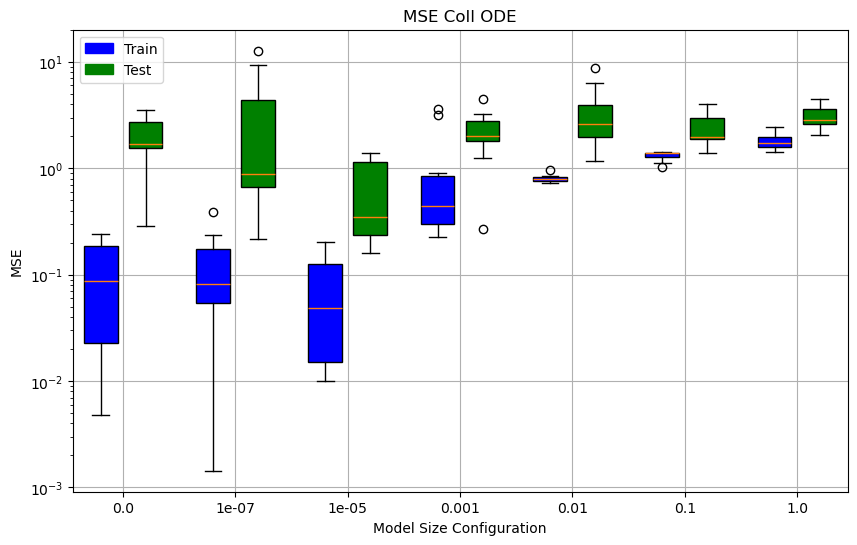

In [67]:
plot_boxplots(MSE_Coll_ODE, MSE_Coll_ODE_Test, df_reg.index, 'MSE Coll ODE', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'], x_label = 'Penalty Strength')
# plot_boxplots(MSE_ODEint, MSE_ODEint_Test, df_reg.index, 'MSE Coll ODE', 'MSE', colors=('blue', 'green'), color_labels=['Train', 'Test'])
